In [1]:
%matplotlib inline
%run helper_functions.py

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
# A helper function to display the tree.
# NOTE: requires pydotplus and graphviz libraries. 
#       for MACOS/LINUX just install by typing "conda install pydotplus" at the terminal
#       for windows its tricker so we can skip this
    
from IPython.display import Image 
import pydotplus
def plot_tree(clf, feature_names, target_names):
    dot_data = sklearn.tree.export_graphviz(clf, out_file=None, 
                             feature_names=feature_names,  
                             class_names= target_names,  
                             filled=True, rounded=True,  
                             special_characters=True) 
    return pydotplus.graph_from_dot_data(dot_data).create_png() 

# LOAD IRIS DATASET

In [3]:
iris = datasets.load_iris()

X, y = iris.data, iris.target
feature_names = iris.feature_names
class_labels = iris.target_names

Accuracy Training         : 0.98
Accuracy Cross Validation : 0.96 (+/- 0.09)


C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt

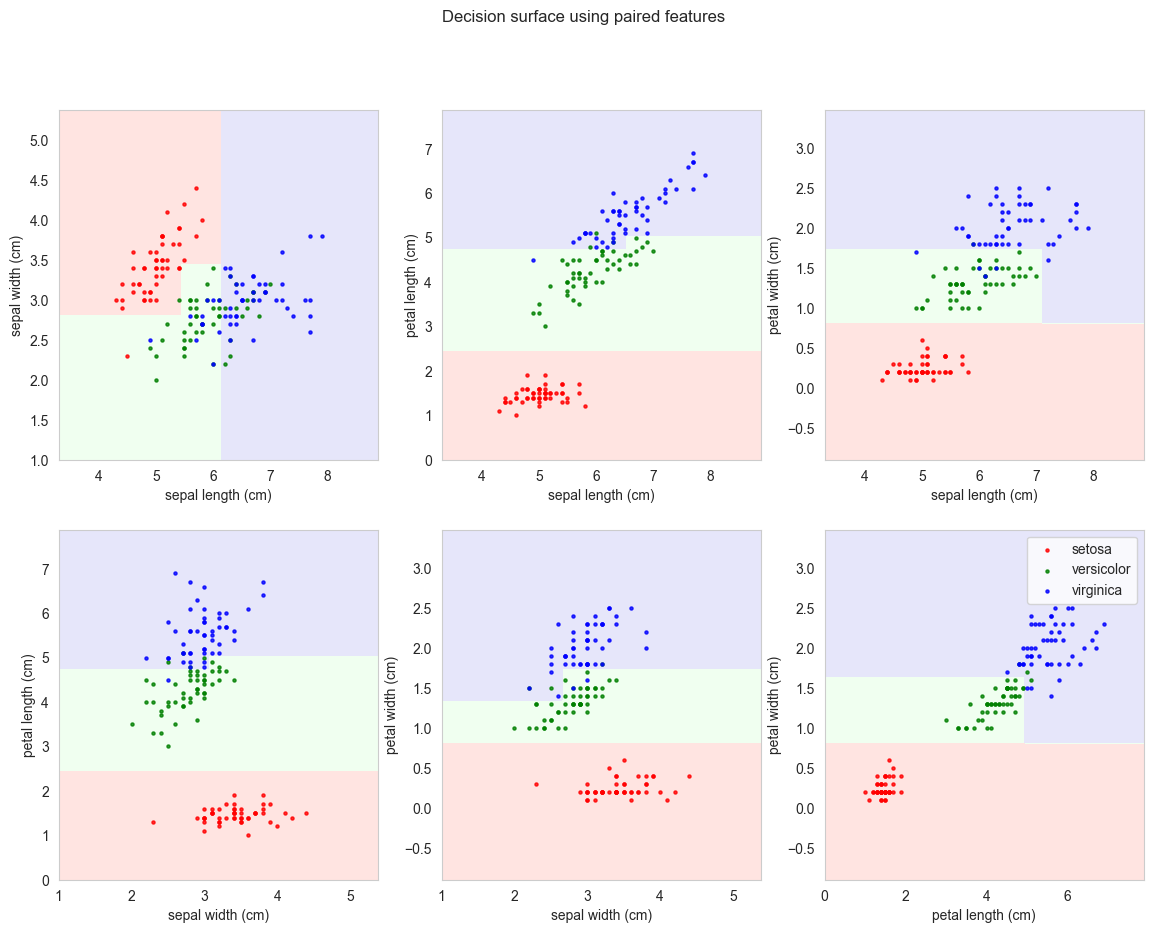

In [4]:
# Define model
tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)

# Train and get the score
score_test = tree.fit(X,y).score(X, y)
print("Accuracy Training         :", score_test)

scores = cross_val_score(tree, X, y, cv=10)
print("Accuracy Cross Validation : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Plot results
plot_boundaries_iris_dataset(tree, iris)

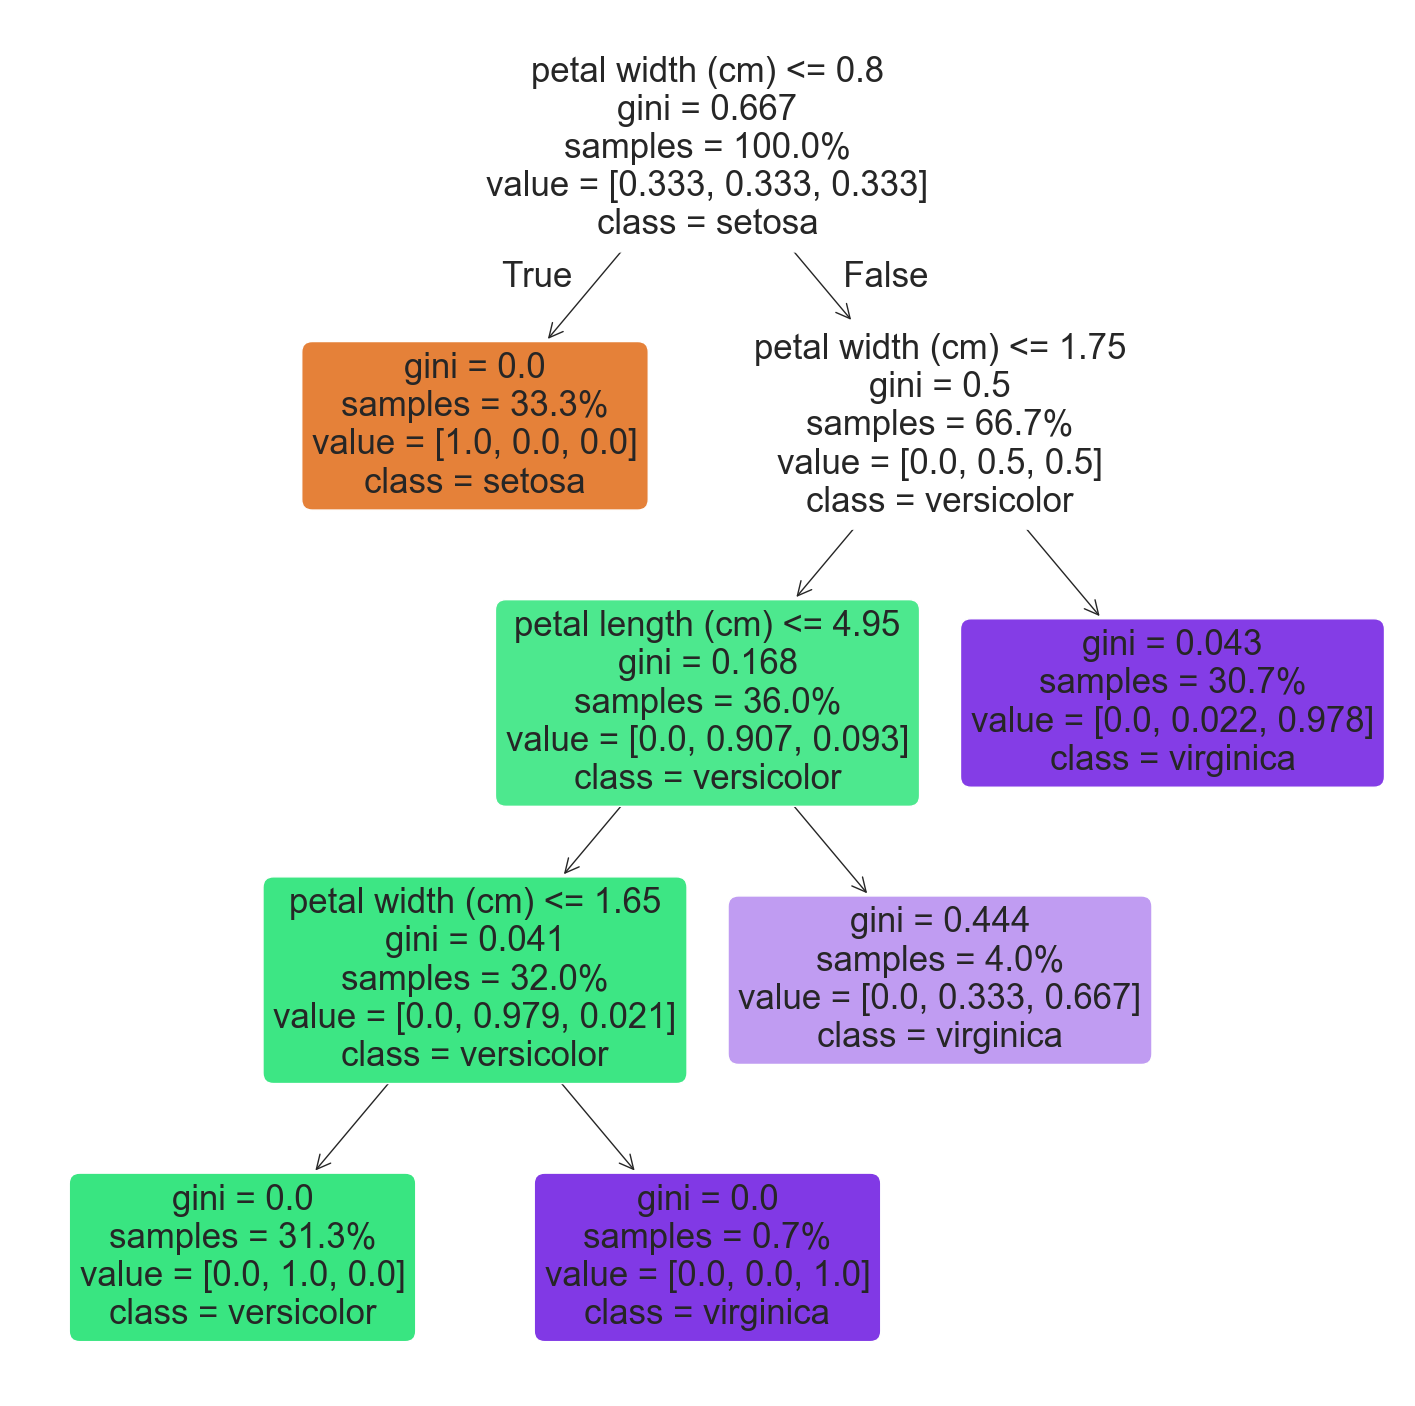

In [5]:
from sklearn.tree import plot_tree

# Plotting Decision Tree
tree.fit(X,y)
plt.figure(figsize=(18,18))
plot_tree(tree, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names,
          filled=True,        
          rounded=True,
          proportion=True)

plt.show()

Best parameters:  DecisionTreeClassifier(max_leaf_nodes=4, min_samples_leaf=2)
Best score:  0.9666666666666668


C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt

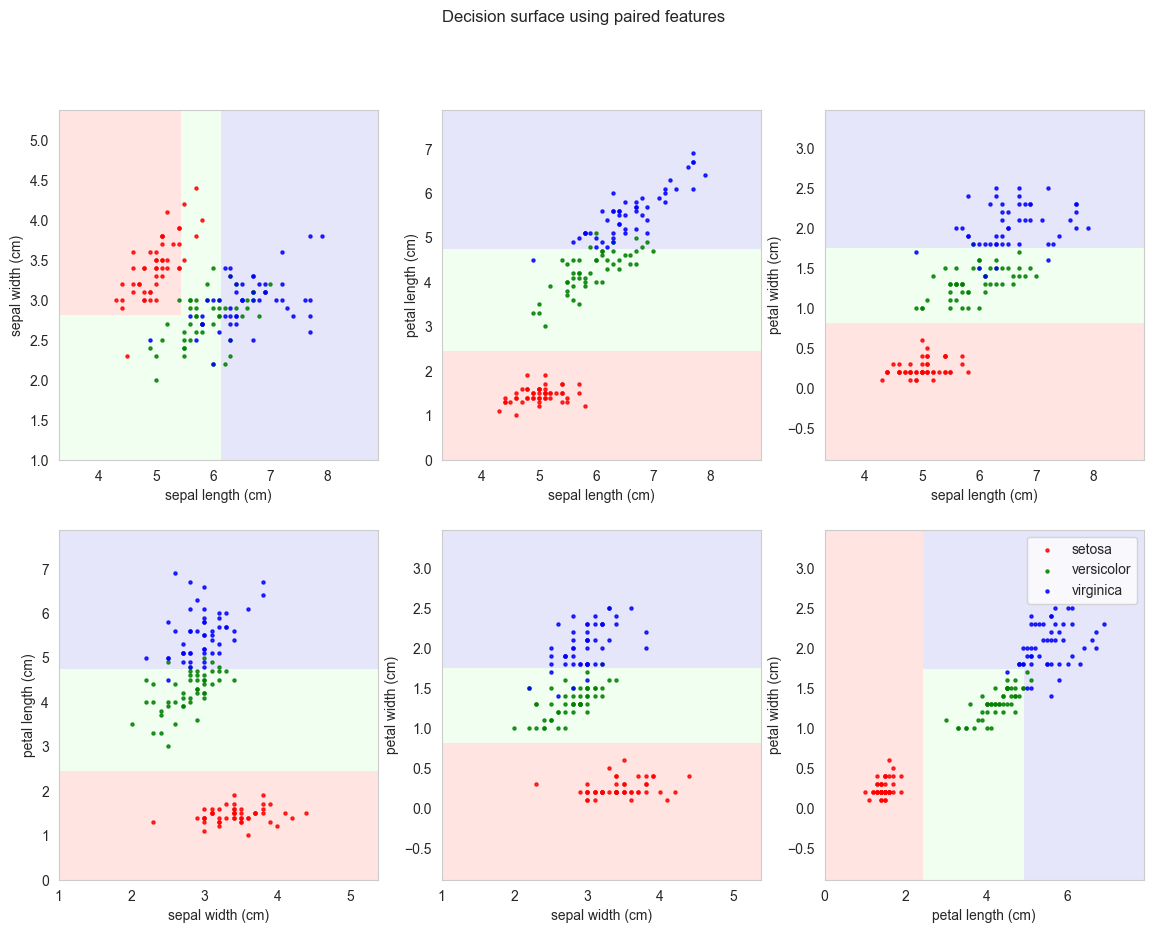

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           'min_samples_leaf':  range(2,10),
           'max_leaf_nodes'  :  range(2,10)
         }

tree = DecisionTreeClassifier()

cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, cv = cv, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

plot_boundaries_iris_dataset(grid.best_estimator_, iris)

## Feature importance

In [7]:
important_features = pd.Series(data=grid.best_estimator_.feature_importances_ , index=feature_names)
important_features.sort_values(ascending=False)

petal width (cm)     0.952375
petal length (cm)    0.047625
sepal width (cm)     0.000000
sepal length (cm)    0.000000
dtype: float64

# Random Forests

Accuracy: 0.96 (+/- 0.08)


C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt

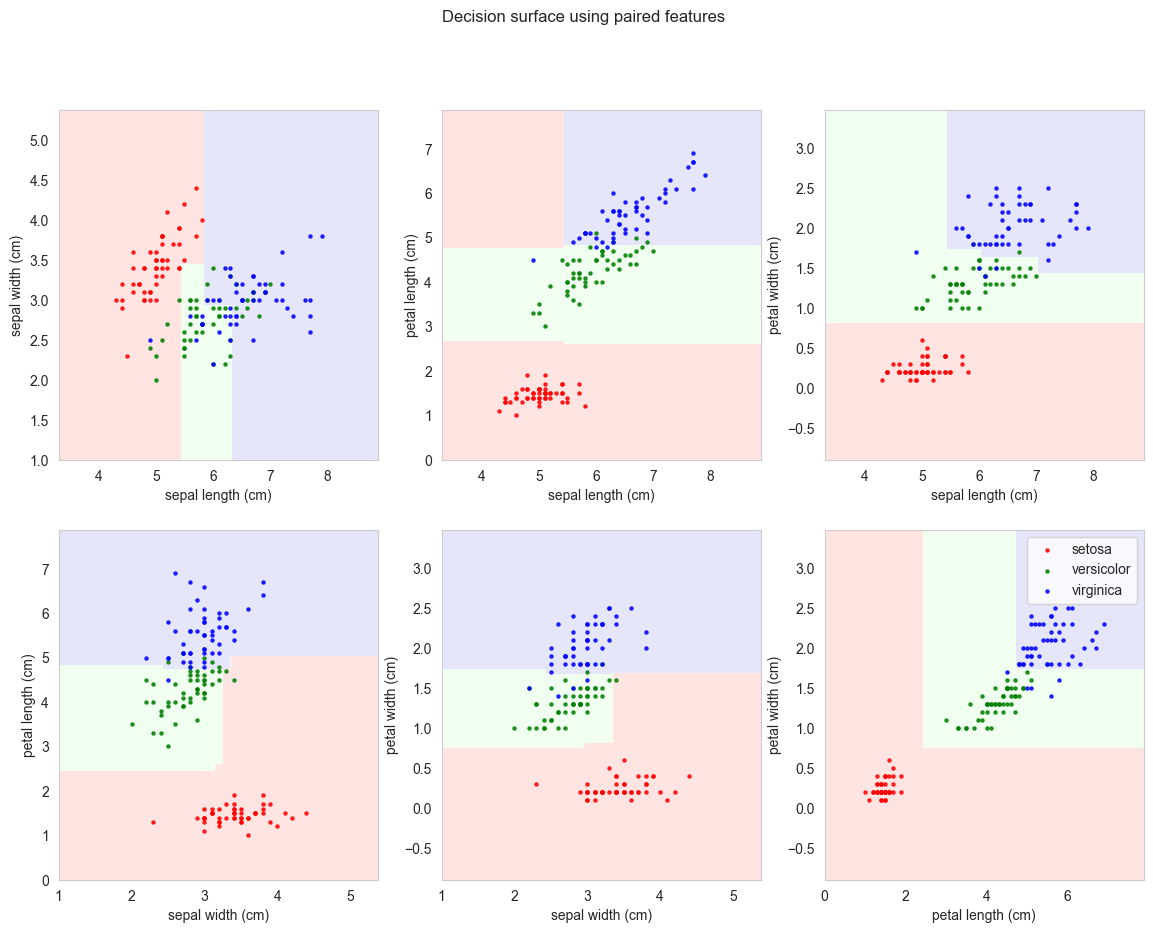

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of threes to grow
tree = RandomForestClassifier(max_leaf_nodes=4, n_estimators=4)
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

plot_boundaries_iris_dataset(tree, iris)

# GradientBoostingClassifier

Accuracy: 0.96 (+/- 0.07)


C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
C:\Users\Admin\Desktop\01_Projects\Data Science Toolbox Containerized\notebooks\helper_functions.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt

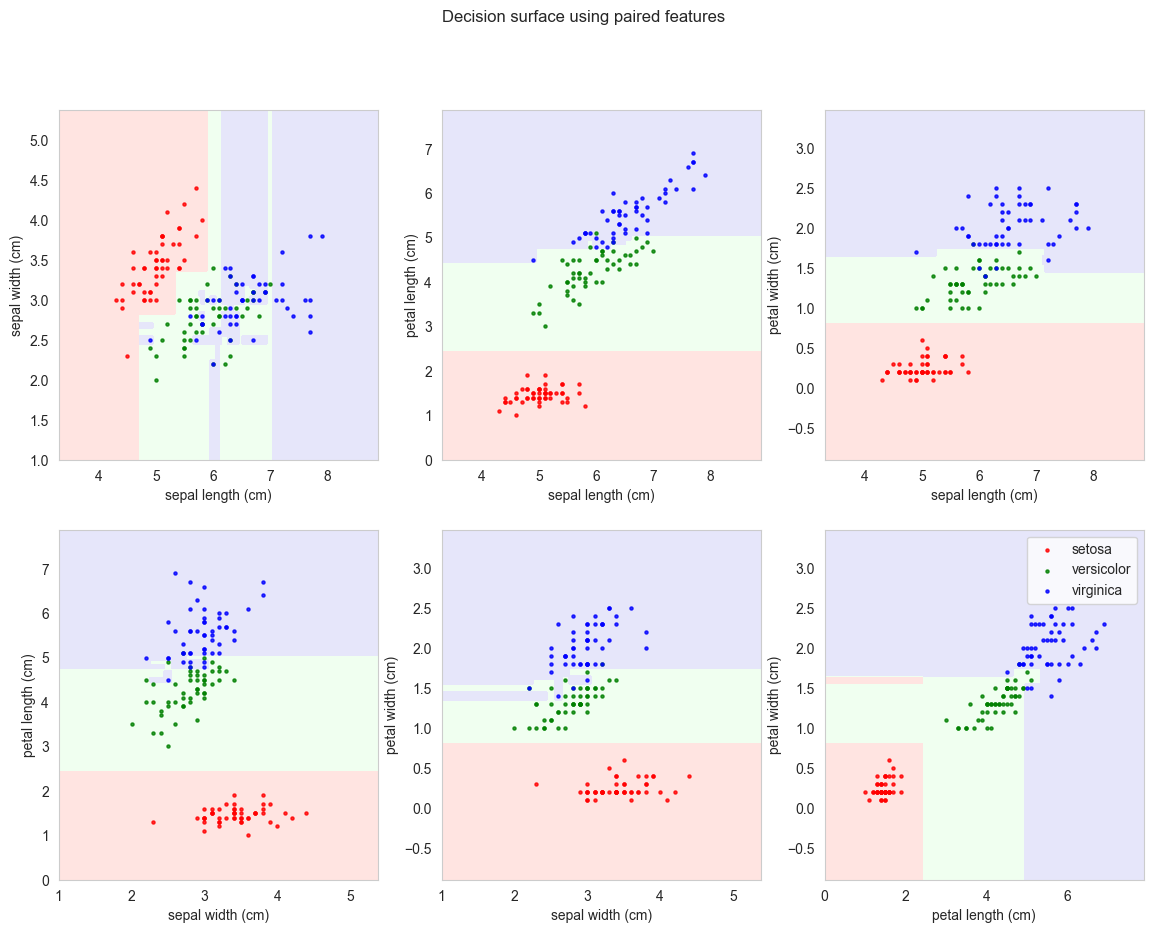

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

tree = GradientBoostingClassifier()
scores = cross_val_score(tree, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

plot_boundaries_iris_dataset(tree, iris)

# Titanic

In [14]:
# Load the boston dataset from sklearn
dataset = pd.read_csv("../data/processed/titanic_clean.csv")
X = dataset.drop('survived', axis = 1)
y = dataset.survived


# to print stats
feature_names = X.columns
class_labels = ["Died", "Survived"]

Best parameters:  DecisionTreeClassifier(max_leaf_nodes=6)
Best score:  0.7955056179775281


[Text(0.4444444444444444, 0.875, 'sex_male <= 0.5\ngini = 0.472\nsamples = 889\nvalue = [549, 340]\nclass = Died'),
 Text(0.2222222222222222, 0.625, 'pclass <= 2.5\ngini = 0.384\nsamples = 312\nvalue = [81, 231]\nclass = Survived'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.101\nsamples = 168\nvalue = [9, 159]\nclass = Survived'),
 Text(0.3333333333333333, 0.375, 'fare <= 23.35\ngini = 0.5\nsamples = 144\nvalue = [72, 72]\nclass = Died'),
 Text(0.2222222222222222, 0.125, 'gini = 0.484\nsamples = 117\nvalue = [48, 69]\nclass = Survived'),
 Text(0.4444444444444444, 0.125, 'gini = 0.198\nsamples = 27\nvalue = [24, 3]\nclass = Died'),
 Text(0.6666666666666666, 0.625, 'age <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]\nclass = Died'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = Survived'),
 Text(0.7777777777777778, 0.375, 'pclass <= 1.5\ngini = 0.28\ns

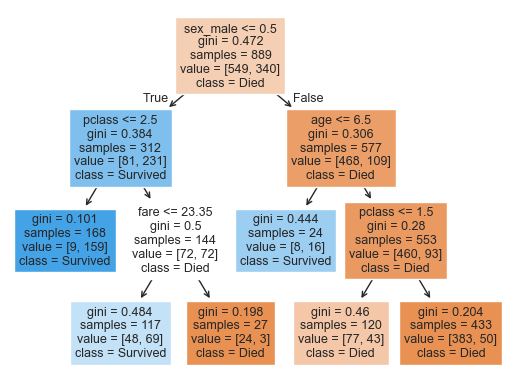

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           #'min_samples_leaf':  range(2,10),
           'max_leaf_nodes'  :  range(2,7)
         }

tree = DecisionTreeClassifier()

cv = ShuffleSplit(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=tree, cv = cv, param_grid=params )
grid.fit(X, y)
# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

#Image(plot_tree(grid.best_estimator_, feature_names, class_labels))

plot_tree(grid.best_estimator_, feature_names=feature_names, class_names=class_labels, filled=True)


In [16]:
important_features = pd.Series(data=tree.fit(X,y).feature_importances_ ,index=feature_names)
important_features.sort_values(ascending=False)

sex_male                   0.308922
age                        0.249312
fare                       0.236598
pclass                     0.106833
sibsp                      0.050205
parch                      0.017220
alone_True                 0.012203
embark_town_Southampton    0.007934
embark_town_Queenstown     0.006364
embark_town_Cherbourg      0.004408
dtype: float64

# Regression

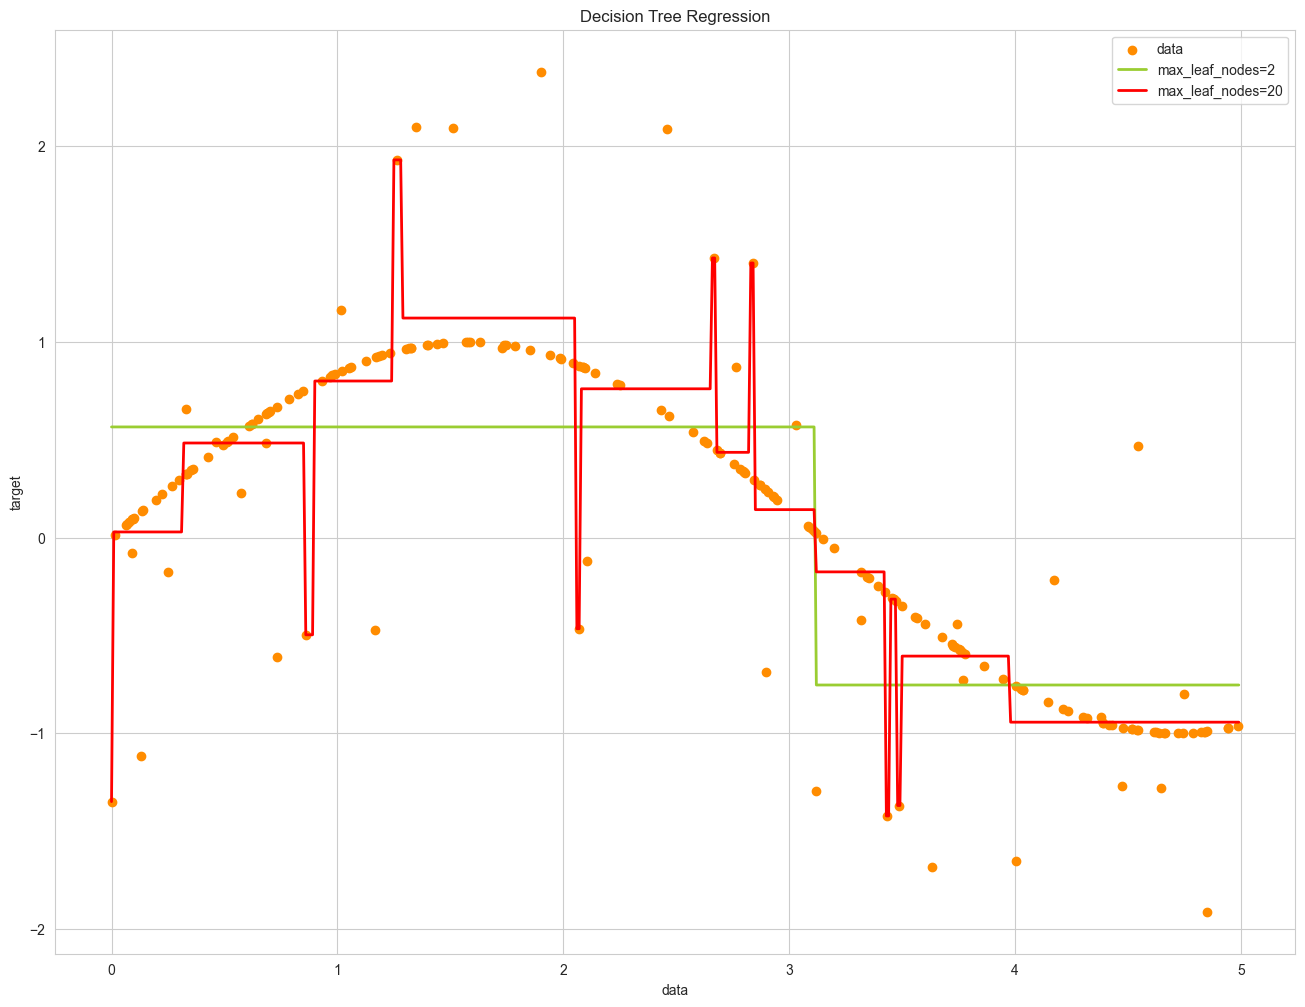

In [17]:
from matplotlib import pylab
from sklearn.tree import DecisionTreeRegressor

pylab.rcParams['figure.figsize'] = 16, 12

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(200, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(40))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_leaf_nodes=2)
regr_1.fit(X, y)

num_leafs = 20
regr_2 = DecisionTreeRegressor(max_leaf_nodes=num_leafs)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="yellowgreen", label="max_leaf_nodes=2", linewidth=2)
plt.plot(X_test, y_2, color="red", label="max_leaf_nodes=%s"%num_leafs, linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()